<a href="https://colab.research.google.com/github/tokaalaa/Facial-Expression-Recognition/blob/main/Facial_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Import the dependencies 
import numpy as np  #for numpy array
import pylab as pl #to form and resize our image
from PIL import Image  #to deal with image
# reshape numyArray from 3D matrice to 2D matrice 
import numpy as gfg 
import matplotlib.image as img 
#for convert to RGB
from collections import defaultdict
import pprint
#for category of Y
from keras.utils import to_categorical
#for splitting data
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# get the data
filname = '../content/drive/My Drive/Facial/fer2013.csv'
#red date
#import pandas as pd
#names=['emotion','pixels','usage']
#df=pd.read_csv(filname,names=names, na_filter=False)
#im=df['pixels']
#df.head(800)

# Get data

In [ ]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X), np.array(Y)
    return X, Y


X, Y = getData(filname)
#reshape our date
#N, D = X.shape
X = X.reshape(35887, 48, 48)

In [ ]:
#This is one example for resize one image
#imgObj = Image.fromarray((X[0] * 255).astype(np.uint8))  #convert matrix to Image object
#resized_imgObj = imgObj.resize((192,192))  #resize Image object
#display(imgObj)
#display(resized_imgObj)
#resized_matrix = np.asarray(resized_imgObj)  #convert Image object to matrix

In [ ]:
#To convert DataSet to numyarray to deal with it
#resized_matrix = np.array(resized_matrix)
    
# reshape it from 3D matrice to 2D matrice 
#imageMat_reshape = resized_matrix.reshape(resized_matrix.shape[0], -1) 
#print("Reshaping to 2D array:", imageMat_reshape.shape) 

 # saving matrice to .csv file 
#gfg.savetxt('geek.csv', imageMat_reshape) 

 # retrieving matrice from the .csv file 
#loaded_2D_mat = gfg.loadtxt('geek.csv') 
  
# reshaping it to 3D matrice 
#loaded_mat = loaded_2D_mat.reshape(N, W, H)
  
#print(loaded_2D_mat[0]) 

#w, h = 512, 512
#data = np.zeros((h, w, 3), dtype=np.uint8)
#data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
#img = Image.fromarray(data, 'RGB')
#img.save('my.png')
#img.show()

In [ ]:
#This loop to resize our data set and save Image object to matrix DataSet
DataSet = []
#N = 17000
N = 35887
W = 75
H = 75
for i in range(N):
  imgObj = Image.fromarray((X[i] * 255).astype(np.uint8))  #convert matrix to Image object
  imgObj = imgObj.resize((W,H))  #resize Image object
  imgObj = imgObj.convert("RGB") #convert to RGB 
  imgObj = np.asarray(imgObj)  #convert Image object to matrix
  DataSet.append(imgObj)


In [ ]:
#To convert DataSet to numyarray to deal with it
#DataSet = np.array(DataSet) /127.5
#DataSet = DataSet - 1.
DataSet = np.array(DataSet) /225.0

# reshape it from 3D matrice to 2D matrice 
#imageMat_reshape = DataSet.reshape(DataSet.shape[0], -1) 
#print("Reshaping to 2D array:", imageMat_reshape.shape) 

 # saving matrice to .csv file 
#gfg.savetxt('geek.csv', imageMat_reshape) 

 # retrieving matrice from the .csv file 
#loaded_2D_mat = gfg.loadtxt('geek.csv') 
  
# reshaping it to 3D matrice 
#loaded_mat = loaded_2D_mat.reshape(N, W, H)
  
#print(loaded_2D_mat[0]) 


In [ ]:
Y = to_categorical(Y[0:N])
#X = DataSet


# Split data

In [ ]:
X, X_test, Y, y_test = train_test_split(DataSet, Y, test_size=0.1, random_state=0)
X, X_val, Y, y_val = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
print(len(X))
print(len(X_val))


In [ ]:
#X_train = X[0:28709]
#Y_train = Y[0:28709]
#X_val = X[28709:32298]
#Y_val = Y[28709:32298]
#X_test = X[32298:]
#Y_test = Y[32298:]

# Inception Model



##Get Date


In [ ]:
!pip install import-ipynb
%cd "/content/drive/My Drive/Facial"
import import_ipynb

import Data as loader

dataLoader = loader.DataLoader()

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=214e4a8c123975fc721a929a8c0ca0b740800128c44f0e018c737221b39e51f0
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
/content/drive/My Drive/Facial
importing Jupyter notebook from Copy_of_Data.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB





## Build Model

In [ ]:
#InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from tensorflow import keras
import tensorflow as tf

N = 35887
W = 75
H = 75
  # this could also be the output a different Keras model or layer

base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(W, H, 3))
  # add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
  # let's add a fully-connected layer
x = tf.keras.layers.Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
  # and a logistic layer
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers:
  layer.trainable = True
mycallbacks = [                                         # define the callbacks
      keras.callbacks.ReduceLROnPlateau(                       # callback to reduce learning rate
          monitor='val_loss',
          factor = 0.1,
          patience=3,
          verbose=1,
          min_lr=1e-8
      ),
      keras.callbacks.EarlyStopping(                          # callback to stop training if no improvement in validation_loss.
        monitor='val_loss', 
        verbose=1,
        patience= 5,
        restore_best_weights=True
        ),
      keras.callbacks.ModelCheckpoint(                      # callback to save the best model if no improvement in validation_AUC.
        monitor='val_accuracy',
        filepath= "/content/drive/My Drive/Facial/checkpoint/Inception_Dropout",
        save_best_only=True,
        mode= 'max',
        verbose=1
        )
    ]
model.compile(optimizer   = Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0),loss='categorical_crossentropy', metrics=['accuracy'])



87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model.history= model.fit(dataLoader.get_train_generator(),
                          callbacks= mycallbacks,
                          epochs=50,
                          validation_data=dataLoader.get_valid_generator())
model.save('/content/drive/My Drive/Facial/Inception_TwoDropout.h5')

Epoch 1/50
228/228 [==============================] - ETA: 0s - loss: 1.7307 - accuracy: 0.3401
Epoch 00001: val_accuracy improved from -inf to 0.33158, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 81s 355ms/step - loss: 1.7307 - accuracy: 0.3401 - val_loss: 2.3405 - val_accuracy: 0.3316
Epoch 2/50
228/228 [==============================] - ETA: 0s - loss: 1.4695 - accuracy: 0.4457
Epoch 00002: val_accuracy improved from 0.33158 to 0.37709, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 79s 348ms/step - loss: 1.4695 - accuracy: 0.4457 - val_loss: 1.7350 - val_accuracy: 0.3771
Epoch 3/50
228/228 [==============================] - ETA: 0s - loss: 1.4130 - accuracy: 0.4654
Epoch 00003: val_accuracy improved from 0.37709 to 0.47585, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 82s 359ms/step - loss: 1.4130 - accuracy: 0.4654 - val_loss: 1.5283 - val_accuracy: 0.4759
Epoch 4/50
228/228 [==============================] - ETA: 0s - loss: 1.2824 - accuracy: 0.5100
Epoch 00004: val_accuracy did not improve from 0.47585
228/228 [==============================] - 47s 206ms/step - loss: 1.2824 - accuracy: 0.5100 - val_loss: 1.5237 - val_accuracy: 0.4740
Epoch 5/50
228/228 [==============================] - ETA: 0s - loss: 1.2319 - accuracy: 0.5340
Epoch 00005: val_accuracy improved from 0.47585 to 0.52910, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 81s 357ms/step - loss: 1.2319 - accuracy: 0.5340 - val_loss: 1.2411 - val_accuracy: 0.5291
Epoch 6/50
228/228 [==============================] - ETA: 0s - loss: 1.1787 - accuracy: 0.5533
Epoch 00006: val_accuracy improved from 0.52910 to 0.55697, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 80s 351ms/step - loss: 1.1787 - accuracy: 0.5533 - val_loss: 1.2658 - val_accuracy: 0.5570
Epoch 7/50
228/228 [==============================] - ETA: 0s - loss: 1.1280 - accuracy: 0.5777
Epoch 00007: val_accuracy did not improve from 0.55697
228/228 [==============================] - 47s 207ms/step - loss: 1.1280 - accuracy: 0.5777 - val_loss: 1.2831 - val_accuracy: 0.5176
Epoch 8/50
228/228 [==============================] - ETA: 0s - loss: 1.0920 - accuracy: 0.5879
Epoch 00008: val_accuracy improved from 0.55697 to 0.57399, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 82s 361ms/step - loss: 1.0920 - accuracy: 0.5879 - val_loss: 1.1335 - val_accuracy: 0.5740
Epoch 9/50
228/228 [==============================] - ETA: 0s - loss: 1.1169 - accuracy: 0.5807
Epoch 00009: val_accuracy did not improve from 0.57399
228/228 [==============================] - 48s 209ms/step - loss: 1.1169 - accuracy: 0.5807 - val_loss: 1.9267 - val_accuracy: 0.4136
Epoch 10/50
228/228 [==============================] - ETA: 0s - loss: 1.0669 - accuracy: 0.6024
Epoch 00010: val_accuracy did not improve from 0.57399
228/228 [==============================] - 47s 208ms/step - loss: 1.0669 - accuracy: 0.6024 - val_loss: 1.2596 - val_accuracy: 0.5650
Epoch 11/50
228/228 [==============================] - ETA: 0s - loss: 1.0261 - accuracy: 0.6187
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00011: val_accuracy improved from 0.57399 to 0.59288, saving model to /content/drive/My Drive/Facial/checkpoin

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 82s 358ms/step - loss: 1.0261 - accuracy: 0.6187 - val_loss: 1.2306 - val_accuracy: 0.5929
Epoch 12/50
228/228 [==============================] - ETA: 0s - loss: 0.9456 - accuracy: 0.6522
Epoch 00012: val_accuracy improved from 0.59288 to 0.63251, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 80s 350ms/step - loss: 0.9456 - accuracy: 0.6522 - val_loss: 1.0019 - val_accuracy: 0.6325
Epoch 13/50
228/228 [==============================] - ETA: 0s - loss: 0.9016 - accuracy: 0.6657
Epoch 00013: val_accuracy did not improve from 0.63251
228/228 [==============================] - 48s 208ms/step - loss: 0.9016 - accuracy: 0.6657 - val_loss: 0.9986 - val_accuracy: 0.6325
Epoch 14/50
228/228 [==============================] - ETA: 0s - loss: 0.8795 - accuracy: 0.6741
Epoch 00014: val_accuracy improved from 0.63251 to 0.64211, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 83s 365ms/step - loss: 0.8795 - accuracy: 0.6741 - val_loss: 0.9828 - val_accuracy: 0.6421
Epoch 15/50
228/228 [==============================] - ETA: 0s - loss: 0.8648 - accuracy: 0.6799
Epoch 00015: val_accuracy improved from 0.64211 to 0.64613, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 81s 357ms/step - loss: 0.8648 - accuracy: 0.6799 - val_loss: 0.9639 - val_accuracy: 0.6461
Epoch 16/50
228/228 [==============================] - ETA: 0s - loss: 0.8466 - accuracy: 0.6848
Epoch 00016: val_accuracy improved from 0.64613 to 0.64768, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 81s 354ms/step - loss: 0.8466 - accuracy: 0.6848 - val_loss: 0.9759 - val_accuracy: 0.6477
Epoch 17/50
228/228 [==============================] - ETA: 0s - loss: 0.8326 - accuracy: 0.6920
Epoch 00017: val_accuracy did not improve from 0.64768
228/228 [==============================] - 48s 211ms/step - loss: 0.8326 - accuracy: 0.6920 - val_loss: 0.9895 - val_accuracy: 0.6399
Epoch 18/50
228/228 [==============================] - ETA: 0s - loss: 0.8150 - accuracy: 0.6953
Epoch 00018: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00018: val_accuracy did not improve from 0.64768
228/228 [==============================] - 48s 210ms/step - loss: 0.8150 - accuracy: 0.6953 - val_loss: 1.0045 - val_accuracy: 0.6347
Epoch 19/50
228/228 [==============================] - ETA: 0s - loss: 0.7948 - accuracy: 0.7047
Epoch 00019: val_accuracy improved from 0.64768 to 0.65851, saving model to /content/drive/My Drive/Facial/checkpoi

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 82s 362ms/step - loss: 0.7948 - accuracy: 0.7047 - val_loss: 0.9756 - val_accuracy: 0.6585
Epoch 20/50
228/228 [==============================] - ETA: 0s - loss: 0.7821 - accuracy: 0.7124
Epoch 00020: val_accuracy did not improve from 0.65851
228/228 [==============================] - 48s 209ms/step - loss: 0.7821 - accuracy: 0.7124 - val_loss: 0.9630 - val_accuracy: 0.6542
Epoch 21/50
228/228 [==============================] - ETA: 0s - loss: 0.7844 - accuracy: 0.7089
Epoch 00021: val_accuracy did not improve from 0.65851
228/228 [==============================] - 49s 216ms/step - loss: 0.7844 - accuracy: 0.7089 - val_loss: 0.9798 - val_accuracy: 0.6474
Epoch 22/50
228/228 [==============================] - ETA: 0s - loss: 0.7793 - accuracy: 0.7125
Epoch 00022: val_accuracy did not improve from 0.65851
228/228 [==============================] - 47s 208ms/step - loss: 0.7793 - accuracy: 0.7125 - val_loss: 0.9726 - val_accuracy: 0.6498
Epoch 23

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_TwoDropout/assets


228/228 [==============================] - 80s 351ms/step - loss: 0.7697 - accuracy: 0.7180 - val_loss: 0.9738 - val_accuracy: 0.6588
Epoch 25/50
228/228 [==============================] - ETA: 0s - loss: 0.7714 - accuracy: 0.7149Restoring model weights from the end of the best epoch.

Epoch 00025: val_accuracy did not improve from 0.65882
228/228 [==============================] - 48s 210ms/step - loss: 0.7714 - accuracy: 0.7149 - val_loss: 0.9794 - val_accuracy: 0.6492
Epoch 00025: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


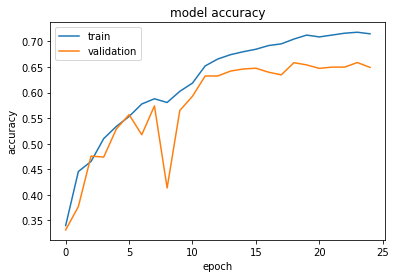

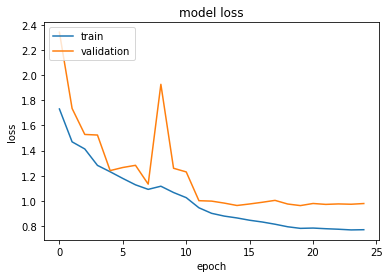

In [ ]:
from matplotlib import pyplot as plt
print(model.history.history.keys())
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.history= model.fit(dataLoader.get_train_generator(),
                          callbacks= mycallbacks,
                          epochs=50,
                          validation_data=dataLoader.get_valid_generator())
model.save('/content/drive/My Drive/Facial/Inception_Dropout.h5')

Epoch 1/50
228/228 [==============================] - ETA: 0s - loss: 1.7097 - accuracy: 0.3313
Epoch 00001: val_accuracy improved from -inf to 0.29876, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 83s 364ms/step - loss: 1.7097 - accuracy: 0.3313 - val_loss: 4.7615 - val_accuracy: 0.2988
Epoch 2/50
228/228 [==============================] - ETA: 0s - loss: 1.4794 - accuracy: 0.4138
Epoch 00002: val_accuracy improved from 0.29876 to 0.41486, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 81s 354ms/step - loss: 1.4794 - accuracy: 0.4138 - val_loss: 2.5851 - val_accuracy: 0.4149
Epoch 3/50
228/228 [==============================] - ETA: 0s - loss: 1.3743 - accuracy: 0.4468
Epoch 00003: val_accuracy improved from 0.41486 to 0.47523, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 80s 352ms/step - loss: 1.3743 - accuracy: 0.4468 - val_loss: 1.5420 - val_accuracy: 0.4752
Epoch 4/50
228/228 [==============================] - ETA: 0s - loss: 1.2790 - accuracy: 0.5032
Epoch 00004: val_accuracy improved from 0.47523 to 0.51610, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 346ms/step - loss: 1.2790 - accuracy: 0.5032 - val_loss: 1.3117 - val_accuracy: 0.5161
Epoch 5/50
228/228 [==============================] - ETA: 0s - loss: 1.2106 - accuracy: 0.5398
Epoch 00005: val_accuracy did not improve from 0.51610
228/228 [==============================] - 48s 209ms/step - loss: 1.2106 - accuracy: 0.5398 - val_loss: 1.3391 - val_accuracy: 0.5149
Epoch 6/50
228/228 [==============================] - ETA: 0s - loss: 1.1430 - accuracy: 0.5739
Epoch 00006: val_accuracy improved from 0.51610 to 0.56440, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 348ms/step - loss: 1.1430 - accuracy: 0.5739 - val_loss: 1.1902 - val_accuracy: 0.5644
Epoch 7/50
228/228 [==============================] - ETA: 0s - loss: 1.0900 - accuracy: 0.5958
Epoch 00007: val_accuracy improved from 0.56440 to 0.56873, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 348ms/step - loss: 1.0900 - accuracy: 0.5958 - val_loss: 1.1671 - val_accuracy: 0.5687
Epoch 8/50
228/228 [==============================] - ETA: 0s - loss: 1.0488 - accuracy: 0.6167
Epoch 00008: val_accuracy improved from 0.56873 to 0.58204, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 80s 350ms/step - loss: 1.0488 - accuracy: 0.6167 - val_loss: 1.1534 - val_accuracy: 0.5820
Epoch 9/50
228/228 [==============================] - ETA: 0s - loss: 1.0214 - accuracy: 0.6272
Epoch 00009: val_accuracy improved from 0.58204 to 0.59102, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 80s 350ms/step - loss: 1.0214 - accuracy: 0.6272 - val_loss: 1.1239 - val_accuracy: 0.5910
Epoch 10/50
228/228 [==============================] - ETA: 0s - loss: 0.9911 - accuracy: 0.6359
Epoch 00010: val_accuracy improved from 0.59102 to 0.61362, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 347ms/step - loss: 0.9911 - accuracy: 0.6359 - val_loss: 1.0891 - val_accuracy: 0.6136
Epoch 11/50
228/228 [==============================] - ETA: 0s - loss: 0.9622 - accuracy: 0.6458
Epoch 00011: val_accuracy did not improve from 0.61362
228/228 [==============================] - 47s 208ms/step - loss: 0.9622 - accuracy: 0.6458 - val_loss: 1.2170 - val_accuracy: 0.5675
Epoch 12/50
228/228 [==============================] - ETA: 0s - loss: 0.9446 - accuracy: 0.6518
Epoch 00012: val_accuracy did not improve from 0.61362
228/228 [==============================] - 47s 206ms/step - loss: 0.9446 - accuracy: 0.6518 - val_loss: 1.3271 - val_accuracy: 0.5954
Epoch 13/50
228/228 [==============================] - ETA: 0s - loss: 0.9188 - accuracy: 0.6669
Epoch 00013: val_accuracy improved from 0.61362 to 0.61610, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Fa

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 346ms/step - loss: 0.9188 - accuracy: 0.6669 - val_loss: 1.0638 - val_accuracy: 0.6161
Epoch 14/50
228/228 [==============================] - ETA: 0s - loss: 0.8930 - accuracy: 0.6687
Epoch 00014: val_accuracy did not improve from 0.61610
228/228 [==============================] - 48s 209ms/step - loss: 0.8930 - accuracy: 0.6687 - val_loss: 1.1666 - val_accuracy: 0.6068
Epoch 15/50
228/228 [==============================] - ETA: 0s - loss: 0.8753 - accuracy: 0.6826
Epoch 00015: val_accuracy did not improve from 0.61610
228/228 [==============================] - 47s 206ms/step - loss: 0.8753 - accuracy: 0.6826 - val_loss: 1.0839 - val_accuracy: 0.6071
Epoch 16/50
228/228 [==============================] - ETA: 0s - loss: 0.8624 - accuracy: 0.6880
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00016: val_accuracy did not improve from 0.61610
228/228 [==============================] - 47s 206ms/step - 

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 347ms/step - loss: 0.7598 - accuracy: 0.7272 - val_loss: 0.9661 - val_accuracy: 0.6560
Epoch 18/50
228/228 [==============================] - ETA: 0s - loss: 0.7022 - accuracy: 0.7471
Epoch 00018: val_accuracy improved from 0.65604 to 0.66656, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 346ms/step - loss: 0.7022 - accuracy: 0.7471 - val_loss: 0.9369 - val_accuracy: 0.6666
Epoch 19/50
228/228 [==============================] - ETA: 0s - loss: 0.6622 - accuracy: 0.7628
Epoch 00019: val_accuracy improved from 0.66656 to 0.67090, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 80s 349ms/step - loss: 0.6622 - accuracy: 0.7628 - val_loss: 0.9793 - val_accuracy: 0.6709
Epoch 20/50
228/228 [==============================] - ETA: 0s - loss: 0.6432 - accuracy: 0.7674
Epoch 00020: val_accuracy did not improve from 0.67090
228/228 [==============================] - 47s 208ms/step - loss: 0.6432 - accuracy: 0.7674 - val_loss: 0.9762 - val_accuracy: 0.6672
Epoch 21/50
228/228 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.7783
Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00021: val_accuracy improved from 0.67090 to 0.67276, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 79s 345ms/step - loss: 0.6215 - accuracy: 0.7783 - val_loss: 0.9792 - val_accuracy: 0.6728
Epoch 22/50
228/228 [==============================] - ETA: 0s - loss: 0.5921 - accuracy: 0.7878
Epoch 00022: val_accuracy did not improve from 0.67276
228/228 [==============================] - 48s 209ms/step - loss: 0.5921 - accuracy: 0.7878 - val_loss: 0.9734 - val_accuracy: 0.6678
Epoch 23/50
228/228 [==============================] - ETA: 0s - loss: 0.5864 - accuracy: 0.7921Restoring model weights from the end of the best epoch.

Epoch 00023: val_accuracy improved from 0.67276 to 0.67430, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_Dropout
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_Dropout/assets


228/228 [==============================] - 80s 349ms/step - loss: 0.5864 - accuracy: 0.7921 - val_loss: 0.9731 - val_accuracy: 0.6743
Epoch 00023: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


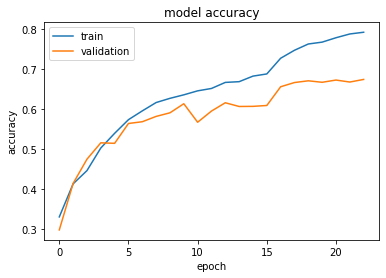

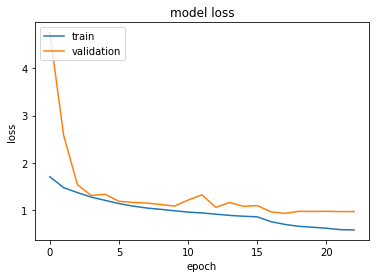

In [ ]:
from matplotlib import pyplot as plt
print(model.history.history.keys())
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
weightsFile = '/content/drive/My Drive/Facial/Inception_Dropout.h5'
model.load_weights(weightsFile)
evaluate_results = model.evaluate(dataLoader.get_test_generator(),
                                                workers= 6)

29/29 [==============================] - 3s 105ms/step - loss: 0.9269 - accuracy: 0.6626


In [ ]:
log_data = pd.read_csv('/content/drive/My Drive/Facial/history.csv', sep=',', engine='python')
# "Accuracy"
plt.plot([float(line) for line in log_data['accuracy']])
plt.plot([float(line) for line in log_data['val_accuracy']])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot([float(line) for line in log_data['loss']])
plt.plot([float(line) for line in log_data['val_loss']])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Train Model

In [ ]:
model.history= model.fit(dataLoader.get_train_generator(),
                          callbacks= mycallbacks,
                          epochs=50,
                          validation_data=dataLoader.get_valid_generator())
model.save('/content/drive/My Drive/Facial/Inception_2.h5')


Epoch 1/50
228/228 [==============================] - ETA: 0s - loss: 1.7439 - accuracy: 0.2964
Epoch 00001: val_accuracy improved from -inf to 0.26873, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 123s 540ms/step - loss: 1.7439 - accuracy: 0.2964 - val_loss: 19.4961 - val_accuracy: 0.2687
Epoch 2/50
228/228 [==============================] - ETA: 0s - loss: 1.4380 - accuracy: 0.4296
Epoch 00002: val_accuracy improved from 0.26873 to 0.39350, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 120s 528ms/step - loss: 1.4380 - accuracy: 0.4296 - val_loss: 1.7620 - val_accuracy: 0.3935
Epoch 3/50
228/228 [==============================] - ETA: 0s - loss: 1.2871 - accuracy: 0.5045
Epoch 00003: val_accuracy improved from 0.39350 to 0.51022, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 121s 529ms/step - loss: 1.2871 - accuracy: 0.5045 - val_loss: 1.3351 - val_accuracy: 0.5102
Epoch 4/50
228/228 [==============================] - ETA: 0s - loss: 1.1935 - accuracy: 0.5414
Epoch 00004: val_accuracy did not improve from 0.51022
228/228 [==============================] - 75s 328ms/step - loss: 1.1935 - accuracy: 0.5414 - val_loss: 6.5623 - val_accuracy: 0.1762
Epoch 5/50
228/228 [==============================] - ETA: 0s - loss: 1.1688 - accuracy: 0.5574
Epoch 00005: val_accuracy did not improve from 0.51022
228/228 [==============================] - 75s 328ms/step - loss: 1.1688 - accuracy: 0.5574 - val_loss: 3.6810 - val_accuracy: 0.5006
Epoch 6/50
228/228 [==============================] - ETA: 0s - loss: 1.1087 - accuracy: 0.5826
Epoch 00006: val_accuracy improved from 0.51022 to 0.58452, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/che

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 119s 524ms/step - loss: 1.1087 - accuracy: 0.5826 - val_loss: 1.1236 - val_accuracy: 0.5845
Epoch 7/50
228/228 [==============================] - ETA: 0s - loss: 1.0426 - accuracy: 0.6111
Epoch 00007: val_accuracy improved from 0.58452 to 0.58793, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 120s 528ms/step - loss: 1.0426 - accuracy: 0.6111 - val_loss: 1.1258 - val_accuracy: 0.5879
Epoch 8/50
228/228 [==============================] - ETA: 0s - loss: 1.0079 - accuracy: 0.6255
Epoch 00008: val_accuracy did not improve from 0.58793
228/228 [==============================] - 76s 333ms/step - loss: 1.0079 - accuracy: 0.6255 - val_loss: 1.1556 - val_accuracy: 0.5749
Epoch 9/50
228/228 [==============================] - ETA: 0s - loss: 0.9810 - accuracy: 0.6323
Epoch 00009: val_accuracy improved from 0.58793 to 0.59907, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 120s 526ms/step - loss: 0.9810 - accuracy: 0.6323 - val_loss: 1.1001 - val_accuracy: 0.5991
Epoch 10/50
228/228 [==============================] - ETA: 0s - loss: 1.0822 - accuracy: 0.5897
Epoch 00010: val_accuracy did not improve from 0.59907
228/228 [==============================] - 75s 328ms/step - loss: 1.0822 - accuracy: 0.5897 - val_loss: 1.7179 - val_accuracy: 0.4783
Epoch 11/50
228/228 [==============================] - ETA: 0s - loss: 1.0156 - accuracy: 0.6205
Epoch 00011: val_accuracy did not improve from 0.59907
228/228 [==============================] - 74s 326ms/step - loss: 1.0156 - accuracy: 0.6205 - val_loss: 1.1168 - val_accuracy: 0.5895
Epoch 12/50
228/228 [==============================] - ETA: 0s - loss: 0.9718 - accuracy: 0.6369
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00012: val_accuracy did not improve from 0.59907
228/228 [==============================] - 74s 326ms/step -

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 119s 522ms/step - loss: 0.8918 - accuracy: 0.6656 - val_loss: 0.9790 - val_accuracy: 0.6375
Epoch 14/50
228/228 [==============================] - ETA: 0s - loss: 0.8502 - accuracy: 0.6826
Epoch 00014: val_accuracy improved from 0.63746 to 0.64303, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 121s 531ms/step - loss: 0.8502 - accuracy: 0.6826 - val_loss: 0.9675 - val_accuracy: 0.6430
Epoch 15/50
228/228 [==============================] - ETA: 0s - loss: 0.8327 - accuracy: 0.6915
Epoch 00015: val_accuracy did not improve from 0.64303
228/228 [==============================] - 75s 330ms/step - loss: 0.8327 - accuracy: 0.6915 - val_loss: 1.0043 - val_accuracy: 0.6359
Epoch 16/50
228/228 [==============================] - ETA: 0s - loss: 0.8260 - accuracy: 0.6908
Epoch 00016: val_accuracy did not improve from 0.64303
228/228 [==============================] - 74s 326ms/step - loss: 0.8260 - accuracy: 0.6908 - val_loss: 1.0475 - val_accuracy: 0.6365
Epoch 17/50
228/228 [==============================] - ETA: 0s - loss: 0.8030 - accuracy: 0.7022
Epoch 00017: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00017: val_accuracy improved from 0.64303 to 0.64458, saving model to /content/drive/My Drive/Facial/checkpo

INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 119s 522ms/step - loss: 0.8030 - accuracy: 0.7022 - val_loss: 0.9965 - val_accuracy: 0.6446
Epoch 18/50
228/228 [==============================] - ETA: 0s - loss: 0.7866 - accuracy: 0.7081
Epoch 00018: val_accuracy improved from 0.64458 to 0.64644, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 120s 527ms/step - loss: 0.7866 - accuracy: 0.7081 - val_loss: 0.9977 - val_accuracy: 0.6464
Epoch 19/50
228/228 [==============================] - ETA: 0s - loss: 0.7808 - accuracy: 0.7112Restoring model weights from the end of the best epoch.

Epoch 00019: val_accuracy improved from 0.64644 to 0.65232, saving model to /content/drive/My Drive/Facial/checkpoint/Inception_2
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/Inception_2/assets


228/228 [==============================] - 120s 526ms/step - loss: 0.7808 - accuracy: 0.7112 - val_loss: 0.9865 - val_accuracy: 0.6523
Epoch 00019: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


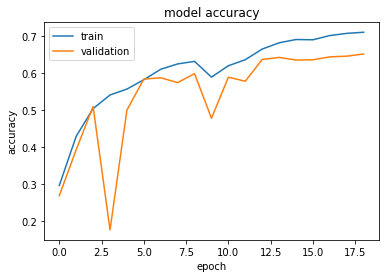

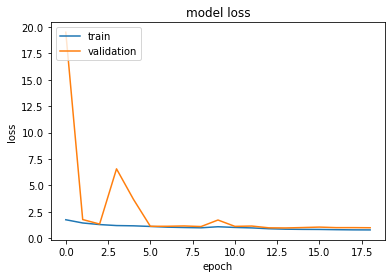

In [ ]:
from matplotlib import pyplot as plt
print(model.history.history.keys())
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.history= model.fit(dataLoader.get_train_generator(),
                          callbacks= mycallbacks,
                          epochs=20,
                          validation_data=dataLoader.get_valid_generator())
model.save('/content/drive/My Drive/Facial/Inception_new.h5')

Epoch 1/20
228/228 [==============================] - ETA: 0s - loss: 1.7228 - accuracy: 0.3062
Epoch 00001: val_accuracy improved from -inf to 0.36440, saving model to ../content/drive/My Drive/Facial/checkpoint/Inception
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../content/drive/My Drive/Facial/checkpoint/Inception/assets
228/228 [==============================] - 129s 565ms/step - loss: 1.7228 - accuracy: 0.3062 - val_loss: 1.5998 - val_accuracy: 0.3644
Epoch 2/20
228/228 [==============================] - ETA: 0s - loss: 1.5178 - accuracy: 0.4051
Epoch 00002: val_accuracy improved from 0.36440 to 0.43870, saving model to ../content/drive/My Drive/Facial/checkpoint/Inception
INFO:tensorflow:Assets written to: ../content/drive/My Drive/Facial/checkpoint/Incepti

In [ ]:
#old_train
model.history= model.fit(x=np.array(X),y=np.array(Y),
                          batch_size=128,callbacks= mycallbacks,
                          epochs=20,
                          validation_data=(np.array(X_val), np.array(y_val)))
model.save('/content/drive/My Drive/Facial/InceptionV3.h5')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


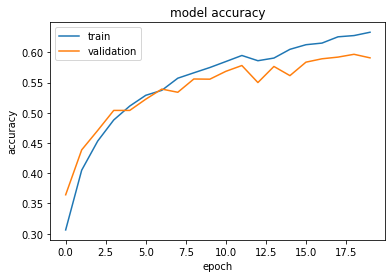

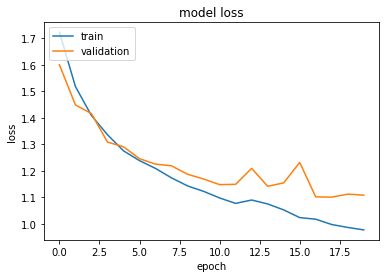

In [ ]:
from matplotlib import pyplot as plt
print(model.history.history.keys())
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Resnet Model

##Get Date


In [ ]:
#!pip install import-ipynb
#%cd "/content/drive/My Drive/Facial"
import import_ipynb

import Data as loader

dataLoader = loader.DataLoader()



## Build Model

In [ ]:
# RESNET Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (48,48,3))

x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation ='relu')(x)
predictions = Dense(7, activation= 'softmax')(x)


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Model(inputs=model.input, outputs=predictions)


In [ ]:
from keras.optimizers import Adam
from tensorflow import keras

for layer in model.layers:
    layer.trainable = True
mycallbacks = [                                         # define the callbacks
      keras.callbacks.ReduceLROnPlateau(                       # callback to reduce learning rate
          monitor='val_loss',
          factor = 0.1,
          patience=3,
          verbose=1,
          min_lr=1e-6
      ),keras.callbacks.ReduceLROnPlateau(                       # callback to reduce learning rate
          monitor='val_accuracy',
          factor = 0.1,
          patience=3,
          verbose=1,
          min_lr=1e-6
      ),
       keras.callbacks.EarlyStopping(                          # callback to stop training if no improvement in validation_loss.
         monitor='val_loss', 
         verbose=1,
         patience= 5,
         restore_best_weights=True
        ),
      keras.callbacks.ModelCheckpoint(                      # callback to save the best model if no improvement in validation_AUC.
        monitor='val_accuracy',
        filepath= "/content/drive/My Drive/Facial/checkpoint/ResNet",
        save_best_only=True,
        mode= 'max',
        verbose=1
        )
    ]
model.compile(optimizer = Adam(lr = 1e-4, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0), loss='categorical_crossentropy', metrics=['accuracy'])

## Train Model

In [ ]:
history= model.fit(dataLoader.get_train_generator(),
                          callbacks= mycallbacks,
                          epochs=10,
                          validation_data=dataLoader.get_valid_generator())
model.save('/content/drive/My Drive/Facial/ResNet20.h5')


Epoch 1/10
228/228 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.6722
Epoch 00001: val_accuracy did not improve from 0.59319
228/228 [==============================] - 26s 115ms/step - loss: 0.8790 - accuracy: 0.6722 - val_loss: 1.2835 - val_accuracy: 0.5740
Epoch 2/10
228/228 [==============================] - ETA: 0s - loss: 0.8519 - accuracy: 0.6843
Epoch 00002: val_accuracy did not improve from 0.59319
228/228 [==============================] - 26s 115ms/step - loss: 0.8519 - accuracy: 0.6843 - val_loss: 1.1783 - val_accuracy: 0.5796
Epoch 3/10
228/228 [==============================] - ETA: 0s - loss: 0.8323 - accuracy: 0.6900
Epoch 00003: val_accuracy did not improve from 0.59319
228/228 [==============================] - 26s 115ms/step - loss: 0.8323 - accuracy: 0.6900 - val_loss: 1.2509 - val_accuracy: 0.5777
Epoch 4/10
228/228 [==============================] - ETA: 0s - loss: 0.8164 - accuracy: 0.6959
Epoch 00004: val_accuracy did not improve from 0.

In [ ]:
#old
model.history= model.fit(np.array(X), np.array(Y),
                          batch_size=128,callbacks= mycallbacks,
                          epochs=20,
                          validation_data=(np.array(X_val), np.array(y_val)))
model.save('/content/drive/My Drive/Facial/ResNet_old.h5')


In [ ]:
#Nada_train
model.history= model.fit(dataLoader.get_train_generator(),
                          callbacks= mycallbacks,
                          epochs=20,
                          validation_data=dataLoader.get_valid_generator())
model.save('/content/drive/My Drive/Facial/ResNet_nada2.h5')


Epoch 1/20
228/228 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.7823
Epoch 00001: val_accuracy improved from 0.64520 to 0.64582, saving model to /content/drive/My Drive/Facial/checkpoint/ResNet
INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/ResNet/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Facial/checkpoint/ResNet/assets


228/228 [==============================] - 51s 223ms/step - loss: 0.5885 - accuracy: 0.7823 - val_loss: 1.0595 - val_accuracy: 0.6458
Epoch 2/20
228/228 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.7844
Epoch 00002: val_accuracy did not improve from 0.64582
228/228 [==============================] - 30s 133ms/step - loss: 0.5848 - accuracy: 0.7844 - val_loss: 1.0742 - val_accuracy: 0.6316
Epoch 3/20
228/228 [==============================] - ETA: 0s - loss: 0.5860 - accuracy: 0.7868
Epoch 00003: val_accuracy did not improve from 0.64582
228/228 [==============================] - 30s 130ms/step - loss: 0.5860 - accuracy: 0.7868 - val_loss: 1.0693 - val_accuracy: 0.6347
Epoch 4/20
228/228 [==============================] - ETA: 0s - loss: 0.5840 - accuracy: 0.7855
Epoch 00004: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00004: val_accuracy did not improve from 0.64582
228/228 [==============================] - 30s 130ms/step - loss: 0.5840 - accur

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


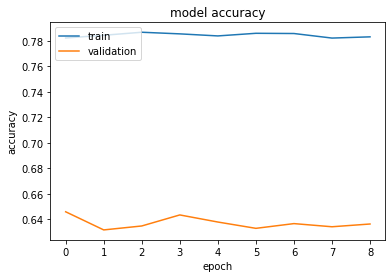

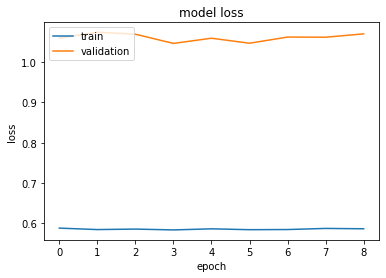

In [ ]:
from matplotlib import pyplot as plt
print(model.history.history.keys())
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Load weights

In [ ]:
weightsFile = '/content/drive/My Drive/Facial/ResNet1.h5'
model.load_weights(weightsFile)

## Plotting

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


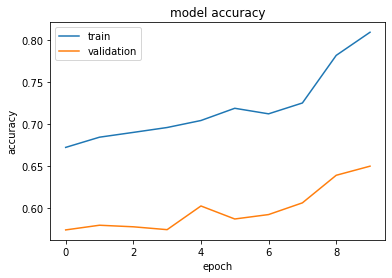

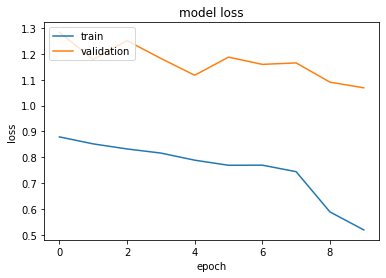

In [ ]:
from matplotlib import pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# VGG Model

## Build Model

In [ ]:
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
def VGGModel():
  inputs = keras.Input(shape=(48,48,3))
  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3)) # Init the VGG model 
  conv_base.trainable = False   # Freeze all the layers
  conv_base = conv_base(inputs, training=False)

  flat = layers.Flatten()(conv_base)
  dense = layers.Dense(256,activation='relu')(flat)
  out = layers.Dense(7, activation='softmax')(dense)

  model = models.Model(inputs=inputs, outputs=out)

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model



In [ ]:
model = VGGModel()
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1799      
Total params: 14,847,815
Trainable params: 133,127
Non-trainable params: 14,714,688
_________________________________________________________________


## Train Model

In [ ]:
history= model.fit(np.array(X_train), np.array(y_train),
                          batch_size=128,
                          epochs=5,
                          validation_data=(np.array(X_val), np.array(y_val)))
model.save('../content/drive/My Drive/Facial/VGG_attempt2.h5')

NameError: ignored

## Load weights

In [ ]:
weightsFile = '/content/drive/My Drive/Facial/VGG_first_attempt.h5'
model.load_weights(weightsFile)

## Plotting

In [ ]:
from matplotlib import pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save and Load history

In [ ]:
#append history to .csv file
import pandas as pd
pd.DataFrame.from_dict(history.history).to_csv('/content/drive/My Drive/Facial/history.csv', mode='a', index=False)

In [ ]:
#read history from .csv file
log_data = pd.read_csv('/content/drive/My Drive/Facial/history.csv', sep=',', engine='python')
log_data
# remove row 5 from log_data 
#log_data.drop(10,inplace=True) 
# save log_data to .csv
#log_data.to_csv('/content/drive/My Drive/Facial/history.csv',index=False) 

,loss,accuracy,val_loss,val_accuracy,lr
0,1.504621,0.444372,1.847530,0.171517,0.0010
1,1.191080,0.550261,1.801749,0.315480,0.0010
2,1.111553,0.585145,1.401298,0.482353,0.0010
3,1.058406,0.603172,1.394452,0.496594,0.0010
4,1.034836,0.611428,1.373781,0.540867,0.0010
5,1.027642,0.616554,1.159592,0.575542,0.0010
6,1.006174,0.625052,1.181600,0.573065,0.0010
7,0.962542,0.641358,1.154200,0.584520,0.0010
8,0.918399,0.656667,1.152663,0.573065,0.0010
9,0.899849,0.661036,1.189062,0.593189,0.0010


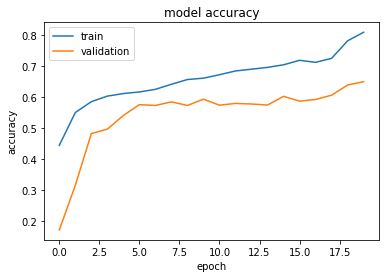

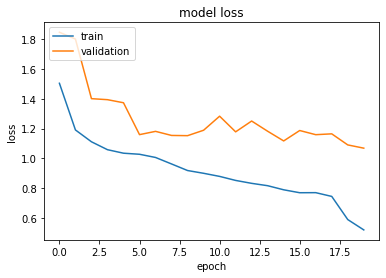

In [ ]:
# "Accuracy"
plt.plot([float(line) for line in log_data['accuracy']])
plt.plot([float(line) for line in log_data['val_accuracy']])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot([float(line) for line in log_data['loss']])
plt.plot([float(line) for line in log_data['val_loss']])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()